## IMPORTING THE LIBRARIES

In [31]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import missingno as msno
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from imblearn.combine import SMOTETomek
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score

## READING THE DATA

In [32]:
abalone_data = pd.read_csv("abalone.csv")
abalone_data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [33]:
abalone_data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

## UNIVATIATE ANALYSIS

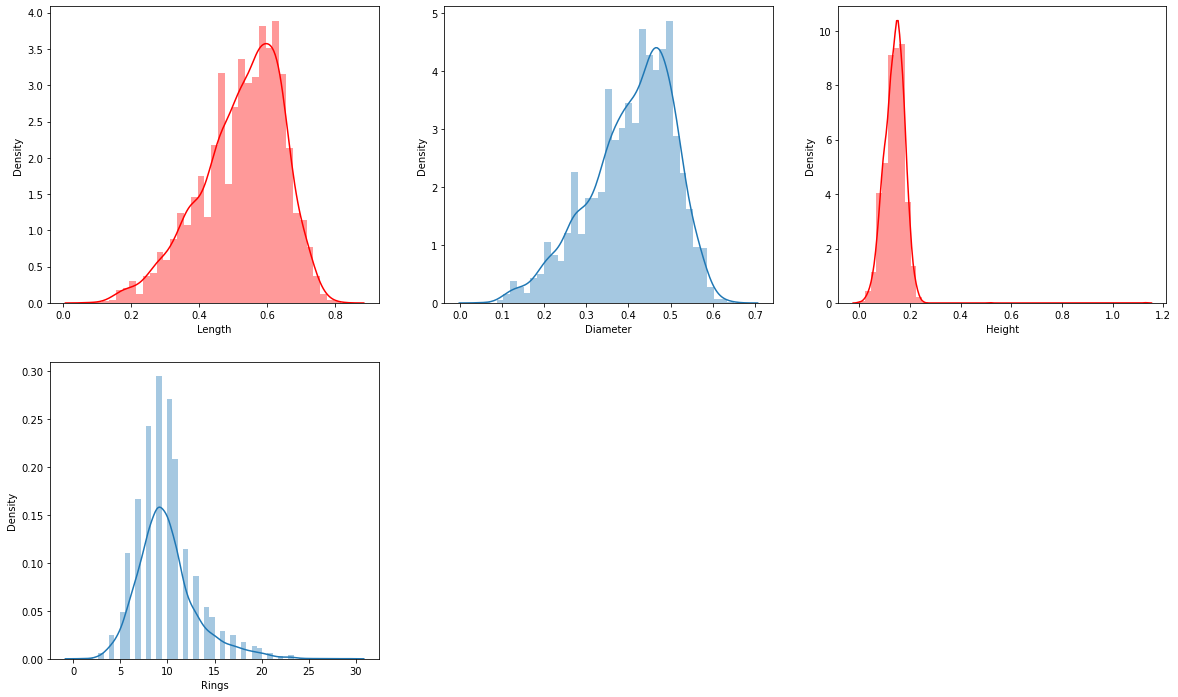

In [34]:
plt.figure(figsize=(20,12))
plt.subplot(231)
sns.distplot(abalone_data['Length'], color='r')
plt.subplot(232)
sns.distplot(abalone_data['Diameter'])
plt.subplot(233)
sns.distplot(abalone_data['Height'], color='r')
plt.subplot(234)
sns.distplot(abalone_data['Rings'])
plt.show()

## BIVARIATE AND MULTIVARIATE ANALYSIS

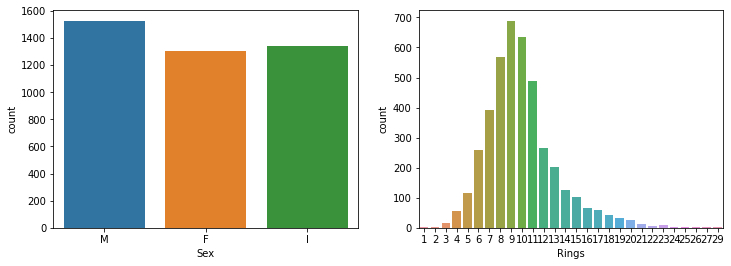

In [35]:
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.countplot(abalone_data['Sex'])
plt.subplot(122)
sns.countplot(abalone_data['Rings'])
plt.show()

## DESCRIPTIVE STATISTICS

In [36]:
abalone_data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


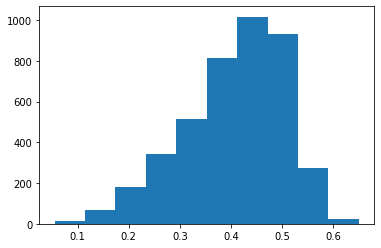

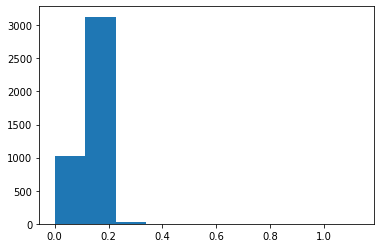

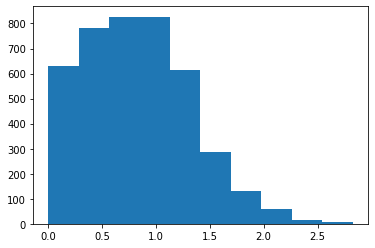

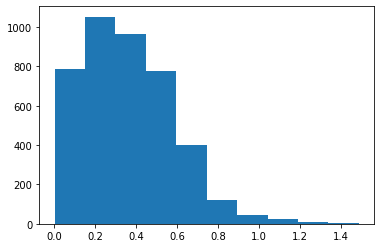

In [37]:
stat_data = abalone_data[['Diameter','Height','Whole weight','Shucked weight']]
for i in stat_data:
  plt.hist(abalone_data[i])
  plt.show()

## HANDLING MISSING VALUES

In [38]:
abalone_data.isna()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4172,False,False,False,False,False,False,False,False,False
4173,False,False,False,False,False,False,False,False,False
4174,False,False,False,False,False,False,False,False,False
4175,False,False,False,False,False,False,False,False,False


In [39]:
null_data = abalone_data.isna().sum()
null_data.sort_values()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

There are no missing values in the dataset.

## ENCODING OF CATEGORICAL COLUMNS

In [40]:
abalone_data.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

##### ADDING A NEW COLUMN IN THE DATASET - AGE(LABEL)

In [41]:
abalone_data['Age'] = abalone_data['Rings'] + 1.5

##### ENCODING CATEGORICAL COLUMNS AND CONVERTING FLOATS TO INTS

In [42]:
label_encoder = preprocessing.LabelEncoder()

abalone_data['Sex']= label_encoder.fit_transform(abalone_data['Sex'])
abalone_data  

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


In [43]:
abalone_data['Length'] = abalone_data['Length'].astype('int64')
abalone_data['Diameter'] = abalone_data['Diameter'].astype('int64')
abalone_data['Height'] = abalone_data['Height'].astype('int64')
abalone_data['Whole weight'] = abalone_data['Whole weight'].astype('int64')
abalone_data['Shucked weight'] = abalone_data['Shucked weight'].astype('int64')
abalone_data['Viscera weight'] = abalone_data['Viscera weight'].astype('int64')
abalone_data['Shell weight'] = abalone_data['Shell weight'].astype('int64')
abalone_data['Rings'] = abalone_data['Rings'].astype('int64')
abalone_data['Age'] = abalone_data['Age'].astype('int64')

abalone_data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,2,0,0,0,0,0,0,0,15,16
1,2,0,0,0,0,0,0,0,7,8
2,0,0,0,0,0,0,0,0,9,10
3,2,0,0,0,0,0,0,0,10,11
4,1,0,0,0,0,0,0,0,7,8
...,...,...,...,...,...,...,...,...,...,...
4172,0,0,0,0,0,0,0,0,11,12
4173,2,0,0,0,0,0,0,0,10,11
4174,2,0,0,0,1,0,0,0,9,10
4175,0,0,0,0,1,0,0,0,10,11


## SPLITTING DATA INTO DEPENDENT AND INDEPENDENT VARIABLES AND SCALING THE DATA

In [44]:
y = abalone_data['Age']
x = abalone_data.drop(columns=['Age'],axis=1)

In [45]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

## SPLIT DATA INTO TRAIN AND TEST SET

In [46]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

## BUILDING THE MODEL, TRAINING THE MODEL, AND MEASURING PERFORMANCE USING METRICS

In [47]:
acc = {}

Confusion Matrix


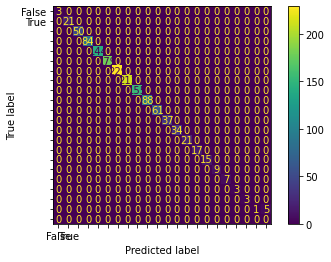

Classification Report
              precision    recall  f1-score   support

           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00        21
           6       1.00      1.00      1.00        50
           7       1.00      1.00      1.00        84
           8       1.00      1.00      1.00       144
           9       1.00      1.00      1.00       179
          10       1.00      1.00      1.00       229
          11       1.00      1.00      1.00       213
          12       1.00      1.00      1.00       155
          13       1.00      1.00      1.00        88
          14       1.00      1.00      1.00        61
          15       1.00      1.00      1.00        37
          16       1.00      1.00      1.00        34
          17       1.00      1.00      1.00        21
          18       1.00      1.00      1.00        17
          19       1.00      1.00      1.00        15
          20       1.00      1.00      1.00         9
     

In [48]:
def Decision_Tree(X_train, X_test, y_train, y_test):
  dt = DecisionTreeClassifier()
  dt.fit(X_train, y_train)

  #predicting the outcome
  y_pred = dt.predict(X_test)
  print("Confusion Matrix")
  cm = confusion_matrix(y_test, y_pred)
  cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
  cm_display.plot()
  plt.show()
  print("Classification Report")
  cr = classification_report(y_test, y_pred)
  print(cr)
  acc['Decision Tree Classifier'] = accuracy_score(y_test,y_pred)
Decision_Tree(X_train, X_test, y_train, y_test)

Confusion Matrix


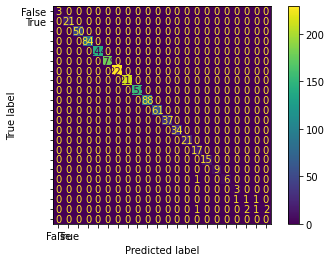

Classification Report
              precision    recall  f1-score   support

           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00        21
           6       1.00      1.00      1.00        50
           7       1.00      1.00      1.00        84
           8       1.00      1.00      1.00       144
           9       1.00      1.00      1.00       179
          10       1.00      1.00      1.00       229
          11       1.00      1.00      1.00       213
          12       1.00      1.00      1.00       155
          13       1.00      1.00      1.00        88
          14       1.00      1.00      1.00        61
          15       1.00      1.00      1.00        37
          16       1.00      1.00      1.00        34
          17       1.00      1.00      1.00        21
          18       0.89      1.00      0.94        17
          19       1.00      1.00      1.00        15
          20       1.00      1.00      1.00         9
     

In [49]:
def Random_Forest(X_train, X_test, y_train, y_test):
  rf = RandomForestClassifier()
  rf.fit(X_train, y_train)

  #predicting the outcome
  y_pred = rf.predict(X_test)
  print("Confusion Matrix")
  cm = confusion_matrix(y_test, y_pred)
  cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
  cm_display.plot()
  plt.show()
  print("Classification Report")
  cr = classification_report(y_test, y_pred)
  print(cr)
  acc['Random Forest Classifier'] = accuracy_score(y_test,y_pred)
Random_Forest(X_train, X_test, y_train, y_test)

Confusion Matrix


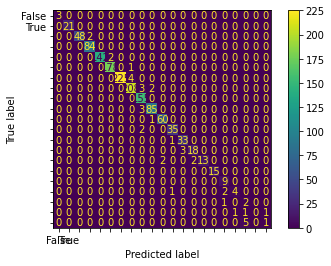

Classification Report
              precision    recall  f1-score   support

           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00        21
           6       1.00      0.96      0.98        50
           7       0.98      1.00      0.99        84
           8       1.00      0.99      0.99       144
           9       0.99      0.99      0.99       179
          10       1.00      0.98      0.99       229
          11       0.98      0.98      0.98       213
          12       0.95      1.00      0.97       155
          13       0.97      0.97      0.97        88
          14       0.97      0.98      0.98        61
          15       0.95      0.95      0.95        37
          16       0.92      0.97      0.94        34
          17       0.90      0.86      0.88        21
          18       1.00      0.76      0.87        17
          19       1.00      1.00      1.00        15
          20       0.75      1.00      0.86         9
     

In [50]:
def KNN(X_train, X_test, y_train, y_test):
  knn = KNeighborsClassifier()
  knn.fit(X_train, y_train)

  #predicting the outcome
  y_pred = knn.predict(X_test)
  print("Confusion Matrix")
  cm = confusion_matrix(y_test, y_pred)
  cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
  cm_display.plot()
  plt.show()
  print("Classification Report")
  cr = classification_report(y_test, y_pred)
  print(cr)
  acc['KNN'] = accuracy_score(y_test,y_pred)
KNN(X_train, X_test, y_train, y_test)

[[ 1.15198011  0.          0.         ...  0.         -0.01547461
  -0.28962385]
 [ 1.15198011  0.          0.         ...  0.         -0.01547461
  -0.59981842]
 [-1.28068972  0.          0.         ...  0.         -0.01547461
   1.88173814]
 ...
 [-0.0643548   0.          0.         ...  0.         -0.01547461
  -0.59981842]
 [-1.28068972  0.          0.         ...  0.         -0.01547461
  -1.22020756]
 [-0.0643548   0.          0.         ...  0.         -0.01547461
  -1.53040213]]
[10  9 17 ...  9  7  6]
Confusion Matrix


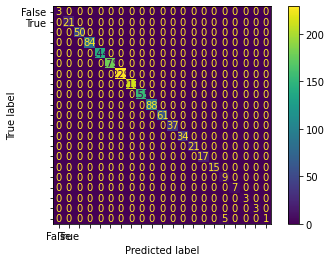

Classification Report
              precision    recall  f1-score   support

           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00        21
           6       1.00      1.00      1.00        50
           7       1.00      1.00      1.00        84
           8       1.00      1.00      1.00       144
           9       1.00      1.00      1.00       179
          10       1.00      1.00      1.00       229
          11       1.00      1.00      1.00       213
          12       1.00      1.00      1.00       155
          13       1.00      1.00      1.00        88
          14       1.00      1.00      1.00        61
          15       1.00      1.00      1.00        37
          16       1.00      1.00      1.00        34
          17       1.00      1.00      1.00        21
          18       1.00      1.00      1.00        17
          19       1.00      1.00      1.00        15
          20       0.64      1.00      0.78         9
     

In [51]:
def XGboost(X_train, X_test, y_train, y_test):
  xg = GradientBoostingClassifier()
  xg.fit(X_train, y_train)
  #predicting the outcome
  y_pred = xg.predict(X_test)
  print(X_test)
  print(y_pred)
  print("Confusion Matrix")
  cm = confusion_matrix(y_test, y_pred)
  cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
  cm_display.plot()
  plt.show()
  print("Classification Report")
  cr = classification_report(y_test, y_pred)
  print(cr)
  acc['Gradient Boost'] = accuracy_score(y_test,y_pred)
XGboost(X_train, X_test, y_train, y_test)